Finding Skewness in ECG data of single recording

ALL IMPORTS

In [1]:
#Importing libraries
import matplotlib
%matplotlib inline
# Reading txt files
from pathlib import Path


In [2]:
#Data manipulation
import numpy as np 
import pandas as pd 
import datetime as dt 
from scipy.stats import skew  
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns  
# Ststistical Analysis 
import statsmodels.api as sm  # type: ignore

DEFINE FILE PATH &
LOAD IN CSV DATA

In [69]:
''' 
notes of future code charterizing bias 
#skewness of said segment length 
def get_se_sk(fname)
seg_lens= list(range(1,11)) 
sk_lst []
for seg_len in seg_lens
sk_list.append calc.skewnesss(seg_len)
df= PD.Dataframe ({"sk": sk_list, 'seg_len': sef_lens})

DFS = []
#glob file path 
for fname in glob ()
DF= get_seg.sk(fname)
ID_, age= get_id_age (fname)
#creates four columns 
DF["ID"]
Df ["Age"]
DFS.Append (DF)
#call on the dict 
DF = PD.Concats DFS
#might have to consider fifth column of experiment types etc
#setting me up to find skewness across all datasets and charterizing biases via these 'columns'

#essentially trying to find an answer if we should keep the 10 min chunks 

# utlizing Bootstrapping
to suggest what the best segment length to address skewness is 
computing mean values and distribution of said seg lengths 
testing multipe segment lengths again and again
ex.)  1000 
#this code 

consider 
data rejection
bias  )
variance 


'''


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
import pandas as pd
#datetime allows me to covert timestamp to date time to set index 
import datetime as dt
#Load in data from a single file into a dataframe
def load_data(filename):
    filename ='/Users/talitheac/data_bradshaw/datacsv.csv/2012_6m_infant_OIX_clean_IBI.txt'#""
    #set names of each column
    df = pd.read_csv(filename, sep='\t', header=None, usecols=[0, 1, 3], names=['timestamp', 'beats', 'ibi'])
    #covert to date time ,s sets parameter in seconds, inplace=true paramere modifies orginal dataframe
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df.set_index('timestamp', inplace=True)
    #convert ibi to seconds from milliseconds
    df['ibi'] = df['ibi']/1000 #convert ibi to seconds
    df['hr'] = (60/df['ibi']).astype(int) #calculate heart rate
    return df
#load in 2012 data file
file_path = "/Users/talitheac/data_bradshaw/datacsv.csv/2012_6m_infant_OIX_clean_IBI.txt"
#df connects file path
df = load_data(file_path)
#is data loaded correctly
print(df)

                              beats       ibi   hr
timestamp                                         
1970-01-01 10:44:18.595732    0.592  0.386955  155
1970-01-01 10:44:18.977732    0.974  0.382327  156
1970-01-01 10:44:19.361732    1.358  0.383825  156
1970-01-01 10:44:19.742732    1.739  0.381106  157
1970-01-01 10:44:20.119732    2.116  0.377194  159
...                             ...       ...  ...
1970-01-01 10:52:47.414732  509.411  0.388825  154
1970-01-01 10:52:47.800732  509.797  0.385182  155
1970-01-01 10:52:48.183732  510.180  0.383712  156
1970-01-01 10:52:48.571732  510.568  0.387348  154
1970-01-01 10:52:48.960732  510.957  0.389251  154

[1257 rows x 3 columns]


#KDE Plot of IBI Distribution

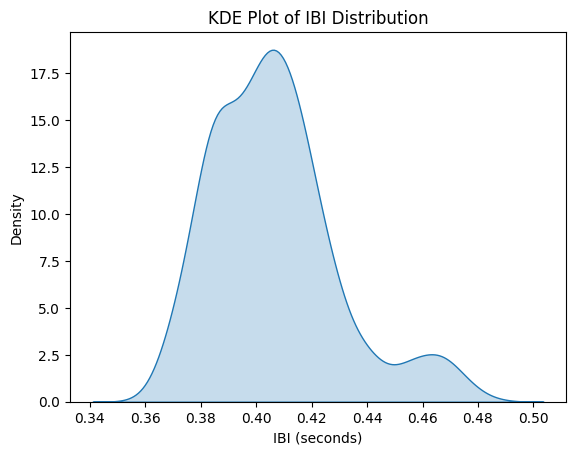

NameError: name 'skewness_scipy_df' is not defined

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df['ibi'], fill=True)
#label the plot
plt.title('KDE Plot of IBI Distribution')
plt.xlabel('IBI (seconds)')
plt.ylabel('Density')
plt.show()
#calculate the skewness of the IBI distribution
skewness_2012 = skewness_scipy_df(df['ibi'])
print("Skewness of IBI distribution of 6 month infant in 2012 is:", np.round(skewness_2012, 5))

In [8]:
n_min = 10
def split_into_chunks(df,n_min):
    #calculate the size of each chunk in minutes
    chunk_size = pd.Timedelta(minutes=n_min)
    #list to store the chunks
    chunks = []
    #find the start and end time of the recording utlizing the index of the df
    start_time = df.index.min()
    end_time = df.index.max()
    current_time = start_time
    #while the current time is less than the end time, we are going to create a chunk
    while current_time > end_time:
        chunk = df.loc[current_time:current_time + chunk_size]
        #appending the chunk to the list of chunks
        chunks.append(chunk)
        #incrementing the current time by the chunk size
        current_time += chunk_size
        #return the list of chunks
    return chunks

#find number of 10 min chunks in a recording (2012 data) 
chunks = split_into_chunks(df, n_min)

# Verify 
print(f"Number of chunks: {len(chunks)}")
if chunks:
    print(f"First chunk duration: {chunks[0].index[-1] - chunks[0].index[0]}")

Number of chunks: 0


 FUNCTIONS

find number of 10 min chunks in a recording (2012 data)


In [15]:
def find_chunks(df, n_min):
    # Calculate the total duration of the recording
    time_diff = df.index[-1] - df.index[0]
    
    # Convert time difference to seconds
    time_diff_seconds = time_diff.total_seconds()
    
    # Calculate number of chunks
    chunks = np.floor(time_diff_seconds / (n_min * 60))
    
    return int(chunks)

#print the number of chunks
n_min = 10
num_chunks = find_chunks(df, n_min)
print(f"Number of {n_min}-minute chunks: {num_chunks}")

Number of 10-minute chunks: 0


test

In [26]:
def split_into_chunks(df, chunk_duration_min):
    chunk_size = pd.Timedelta(minutes=chunk_duration_min)
    chunks = []
    start_time = df.index.min()
    end_time = df.index.max()
    
    # Calculate total duration
    total_duration = end_time - start_time
    print(f"Total duration: {total_duration}")
    
    # Calculate number of complete chunks
    num_complete_chunks = int(total_duration / chunk_size)
    print(f"Number of complete chunks: {num_complete_chunks}")
    
    current_time = start_time
    #this for loop creates the chunks
    #num_complete_chunks is the number of chunks we want to create
    for _ in range(num_complete_chunks):
        chunk = df.loc[current_time:current_time + chunk_size - pd.Timedelta(seconds=1)]
        chunks.append(chunk)
        current_time += chunk_size
    
    return chunks

# Usage 
chunk_duration_min = 10  
chunks = split_into_chunks(df, chunk_duration_min)

# Verify the result
print(f"Number of chunks: {len(chunks)}")
if chunks:
    print(f"First chunk duration: {chunks[0].index[-1] - chunks[0].index[0]}")
else:
    print("No complete chunks found")

# Also run the find_chunks function for comparison
num_chunks = find_chunks(df, chunk_duration_min)
print(f"Number of {chunk_duration_min}-minute chunks (find_chunks): {num_chunks}")

Total duration: 0 days 00:08:30.365000
Number of complete chunks: 0
Number of chunks: 0
No complete chunks found
Number of 10-minute chunks (find_chunks): 0


In [31]:
"""
    This function, truncate_and_split_into_chunks,
    Calculates a new end time that fits complete chunks by using integer division.
    Only creates chunks up to this new end time, ensuring all chunks are complete. (10 min)
    Uses pd.Timedelta(seconds=1) to avoid including the start of the next chunk. (time delta is the difference between two time points)
     also calculates how much data was truncated.
    ensures that I only work with complete 10-minute chunks, discarding any remaining data that doesn't fit into a full chunk. 
    had no full chunks
    """
    
    
    
def truncate_and_split_into_chunks(df, chunk_duration_min):
    """Split DataFrame into chunks of specified duration in minutes, truncating excess data."""
    chunk_size = pd.Timedelta(minutes=chunk_duration_min)
    chunks = []
    df 
    start_time = df.index.min() #finds the first timestamp in the dataframe using the timestamp column
    end_time = df.index.max() #finds the last timestamp in the dataframe using the timestamp column
    
    # Calculate the new end time that fits complete chunks
    new_end_time = start_time + (((end_time - start_time) // chunk_size) * chunk_size)
    """current time = start time lets the chunks initalize to start of the data, 
    while current_time< new_end_time: this loop continues until we reach the new_end_time(to ensure we only create complete chunks)
    """
    current_time = start_time
    while current_time < new_end_time:
        chunk = df.loc[current_time:current_time + chunk_size - pd.Timedelta(seconds=1)]
        chunks.append(chunk)
        current_time += chunk_size
    
    return chunks

# Usage:
chunk_duration_min = 10
truncated_chunks = truncate_and_split_into_chunks(df, chunk_duration_min)

# Verify the results
print(f"Number of complete 10-minute chunks: {len(truncated_chunks)}")
if truncated_chunks:
    #print the duration of the first and last chunk
    first_chunk = truncated_chunks[0]
    last_chunk = truncated_chunks[-1]
    print(f"Duration of first chunk: {first_chunk.index[-1] - first_chunk.index[0]}")
    print(f"Duration of last chunk: {last_chunk.index[-1] - last_chunk.index[0]}")

# Calculate the truncated data
original_duration = df.index[-1] - df.index[0]
#calculate the duration of the truncated chunks
truncated_duration = (len(truncated_chunks) * chunk_duration_min)
#calculate the truncated minutes by subtracting the truncated duration from the original duration
truncated_minutes = original_duration.total_seconds() / 60 - truncated_duration
print(f"Truncated data: {truncated_minutes:.2f} minutes")

Number of complete 10-minute chunks: 0
Truncated data: 8.51 minutes


In [38]:
# Calculate skewness of a dataframe
def skewness_scipy_df(data):
    if len (data) > 0:
        print (len(df))
        sk= skew(data, bias=False)
        #needed to return something essentially was empty , thats why it kept returning none 
        return sk
    else:
        sk = float('NaN')
        print('data size 0')
        return sk

In [39]:
print(skewness_scipy_df(df))

1257
[ 0.02898573  0.87211159 -0.54382812]


Function to find chunks of N_min 

In [50]:
# Function to find the number of chunks
def find_chunks(n_min, data_dict):
    chunk_count_dict = {}
    # Calculate the number of chunks in each file
    for key, df in data_dict.items():
        # Add new column "time" which is "timestamp" column in DateTimeIndex format
        df['time'] = pd.to_datetime(df['timestamp'], unit='s', infer_datetime_format=True)
        
        # Find the duration of the recording by finding the difference between the last and first timestamp
        time_diff = df['time'].iloc[-1] - df['time'].iloc[0]
        
        # Convert duration to minutes
        time_diff_minutes = time_diff.total_seconds() / 60
        
        # Number of chunks are obtained by taking the floor of (total_duration_of_recording/total_number_of_sec_in_nmin)
        chunks = np.floor(time_diff_minutes / n_min)
        chunk_count_dict[key] = int(chunks)
    
    return chunk_count_dict


Function to find Skewness of each 10 min chunk in 2012 data

In [51]:
 def calculate_chunk_skewness(df, chunk_duration_min):
    chunk_duration_min = 10
    chunks = truncate_and_split_into_chunks(df, chunk_duration_min)
    #calculate the skewness for each chunk
    skewness_dict = {}
    for i, chunk in enumerate(chunks):
        chunk_skewness = skewness_scipy_df(chunk['ibi'])
        skewness_dict[f'chunk_{i+1}'] = chunk_skewness
    
    return skewness_dict
print(calculate_chunk_skewness(df, chunk_duration_min))


{}


In [64]:
"""#suppose to print the skewness of each chunk but no chunks in this analysis 
# verify the results
#not using this but will save rhis 
chunk_duration_min = 10
#this function takes the dataframe and the chunk duration as input and returns a dictionary with the skewness of each chunk
skewness_results = calculate_chunk_skewness(df, chunk_duration_min)

# Print the results
print(f"Skewness of {chunk_duration_min}-minute chunks:")
for chunk, skewness in skewness_results.items():
    print(f"{chunk}: {skewness:.4f}")
#if there are no 10 min chunks, the skewness will be NaN
    if skewness is None:
        print ("No 10 min chunks")


""";

Skewness of IBI distribution (ibi being the time between heartbeats)

In [65]:
from scipy.stats import skew

import numpy as np
def skewness_scipy_df(data):
    if len(data) > 0:
        sk = skew(data, bias=False, nan_policy='omit')
        return sk
    else:
        print('Data size is 0')
        return float('NaN')

# Usage:
skewness_2012 = skewness_scipy_df(df['ibi'])
print("Skewness of IBI distribution of 6 month infant in 2012 is:", np.round(skewness_2012, 5))

Skewness of IBI distribution of 6 month infant in 2012 is: 0.87211
